In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

---
### Quelle est la meilleure stratégie ?

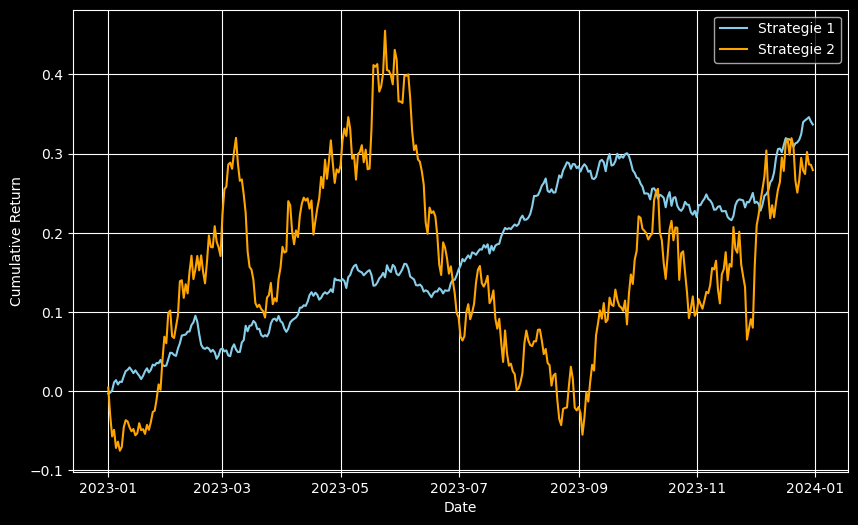

In [2]:
# génération de stratégies de trading "aléatoires"
# Constants for simulation
np.random.seed(75)
n_days = 365  # Number of days (Crypto market trades every day)
daily_return = 0.0005  # Daily return (approx 15% annual return)
vol_high_sharpe = 0.005  # Low daily volatility for high Sharpe strategy
vol_low_sharpe = 0.02  # Higher daily volatility for low Sharpe strategy

# Generate random daily returns
returns_high_sharpe = np.random.normal(daily_return, vol_high_sharpe, n_days)
returns_low_sharpe = np.random.normal(daily_return, vol_low_sharpe, n_days)

# Calculate cumulative returns for both strategies
cumulative_returns_high_sharpe = (1 + returns_high_sharpe).cumprod() - 1
cumulative_returns_low_sharpe = (1 + returns_low_sharpe).cumprod() - 1

# Create a DataFrame to hold the data
dates = pd.date_range(start='2023-01-01', periods=n_days, freq='D')
df = pd.DataFrame({
    'High Sharpe': cumulative_returns_high_sharpe,
    'Low Sharpe': cumulative_returns_low_sharpe
}, index=dates)

# Plot the results
# Set the dark theme
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(df['High Sharpe'], label='Strategie 1', color='skyblue')
plt.plot(df['Low Sharpe'], label='Strategie 2', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

> #### Dans quelle stratégie investissez vous sachant que la performance finale est identique ? :


- Douleur de la volatilité
- Confiance
- Liquidité

---
### Une histoire de chemin

> **Le sharpe ratio nous permet de comprendre le chemin et le risque pris pour arriver à la performance finale.**

>#### 1) Calcul du sharpe ratio
$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$
Où :
- \(R_p\) est le rendement du portefeuille (la perf)
- \(R_f\) est le taux sans risque (1-5% taux obligataire)
- \(σp) est la volatilité du portefeuille (Le chemin)


Ex. du Sharpe Ratio Annualisé :

>Rp = 30%  
>Rf = 3%  
>σp = 20%  
>Sharpe Ratio -> (30% - 3%) / 20% = 1.35


>>Le Sharpe Ratio idéal :  
>>(50% - 3%) / 0% = "infini"

>>Le Sharpe Ratio d'une stratégie qui sert à rien :  
(3% - 3%) / 50% = 0

>>Le Sharpe Ratio qu'on veut éviter :  
(-30% -3%) / 50% = negatif

>  #### 2) Le Sharpe Ratio excess return-free  
- Simplification du Taux sans risque (négligeable et jamais fixe...)  
$$
\text{Sharpe Ratio} = \frac{R_p}{\sigma_p}
$$

> #### 3) Le Sharpe Ratio annualisé (apple to apple)

>3.1) Calcul Annuel des rendements (linéaire)
$$
\text{Rendement annuel} = \text{Rendement quotidien} \times 252
$$


>3.2) Calcul Annuel de la volatilité (quadratique)

$$
\text{Volatilité annuelle} = \text{Volatilité quotidienne} \times \sqrt{\text{Nombre de jours de trading par an}}
$$

- Si la volatilité quotidienne est de 1 % (actions):
$$
\text{Volatilité annuelle} = 1 \% \times \sqrt{252} = 15,87 \%
$$

>3.3) Calcul du Sharpe Ratio annualisé
$$
\text{Sharpe Ratio Annualisé} = \frac{R_p}{\sigma_p} \times \sqrt{NumD}
$$
Où :
- \(R_p\) = np.mean(returns)
- \(σp\) = np.std(returns)
- \(NumD\) = Nombres de jour (252 actions / 365 crypto)
- \(returns\) = rendements quotidiens calculée par (.pct_change()) $$ \text{Return}_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

---
### Le Sharpe ratio en pratique

In [7]:
# Creation d'une fonction pour calculer le ratio de Sharpe Ratio exess return free annualisé

def calculate_sharpe_ratio(returns, n_days=365):
    # Calcul moyenne et écart-type des rendements
    mean_return = np.mean(returns) #Rp
    std_dev = np.std(returns) #σp
    
    # Calcul du SR
    sharpe_ratio = mean_return / std_dev

    # Retourne le SR annualisé
    return sharpe_ratio * np.sqrt(n_days)

In [8]:
# Calcul du SR pour les deux stratégies précédentes
Sharpe_ann_highSR = calculate_sharpe_ratio(returns_high_sharpe, n_days=365)
Sharpe_ann_lowSR = calculate_sharpe_ratio(returns_low_sharpe, n_days=365)

print(f"Sharpe Ratio Strat 1 (bleue) High sharpe : {round(Sharpe_ann_highSR,2)}")
print(f"Sharpe Ratio Strat 2 (orange) Low sharpe : {round(Sharpe_ann_lowSR,2)}")

Sharpe Ratio Strat 1 (bleue) High sharpe : 3.01
Sharpe Ratio Strat 2 (orange) Low sharpe : 0.85


---
### Comment évaluer le sharpe ratio ?

> #### Exemples :

- SP500 : 0.67 (10Y)   
https://www.morningstar.com/indexes/spi/spx/risk   
& code 

- Warren Buffet : 0.76 (1926-2011)  
"https://rpc.cfainstitute.org/en/research/cfa-digest/2014/08/buffetts-alpha-digest-summary#:~:text=Buffett%20produced%20a%20Sharpe%20ratio,years%20during%201926%20through%202011."

- BTC : 1.06 (2014-2024)

#### Calcul du SR : SP500

In [9]:
# Télécharger les données historiques du SP500
sp500_data = yf.download('^GSPC', start='2014-01-01', end='2024-01-01')

# Calculer les rendements quotidiens
sp500_data['Returns'] = sp500_data['Close'].pct_change()
sp500_data.dropna(inplace=True)

# Calculer le Sharpe Ratio pour le SP500
sharpe_ratio_sp500 = calculate_sharpe_ratio(sp500_data['Returns'], n_days=252)
print(f"The Sharpe Ratio SP500 (2014-2024): {sharpe_ratio_sp500:.2f}")

[*********************100%%**********************]  1 of 1 completed

The Sharpe Ratio SP500 (2014-2024): 0.63


#### Calcul du SR : BTC

In [10]:
# Données historiques de Bitcoin
btc_data = yf.download('BTC-USD', start='2014-01-01', end='2024-01-01')

# Calculer les rendements quotidiens
btc_data['Returns'] = btc_data['Close'].pct_change()
btc_data.dropna(inplace=True)

# Calculer le SR pour Bitcoin
sharpe_ratio_btc = calculate_sharpe_ratio(btc_data['Returns'],n_days=365)
print(f"The Sharpe Ratio Bitcoin (2014-2024): {sharpe_ratio_btc:.2f}")

[*********************100%%**********************]  1 of 1 completed

The Sharpe Ratio Bitcoin (2014-2024): 1.05


>#### Echelle d'interprétation :
- < à 0 : Jouer au casino
- 0 à 1 : Autant faire du buy and hold  
- 1 à 2 : Bonnes performances  
- Supérieur à 2 : Les meilleurs hedge funds & traders performants

---
### L'avantage d'un Sharpe Ratio élevé ?

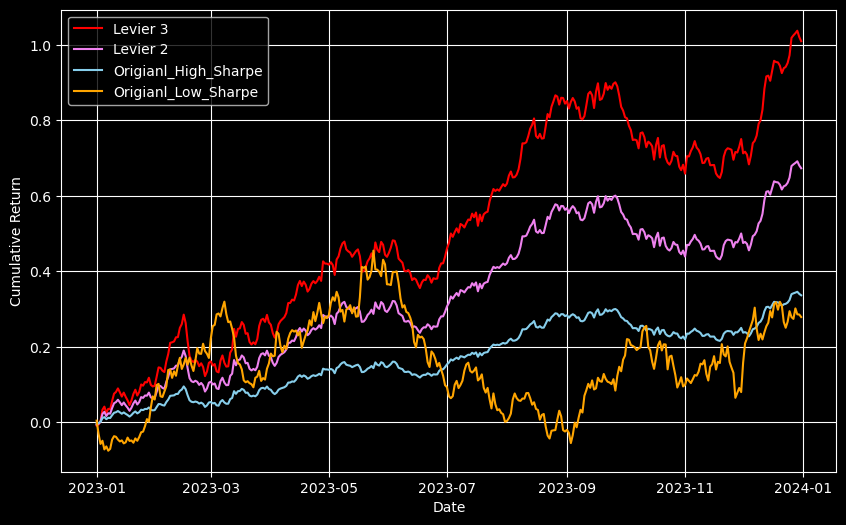

In [12]:
# Ajout de levier à la stratégie à haut Sharpe Ratio 
df['High_Sharpe_L1'] = df['High Sharpe'] * 2
df['High_Sharpe_L2'] = df['High Sharpe'] * 3

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['High_Sharpe_L2'], label='Levier 3 ', color='red')
plt.plot(df['High_Sharpe_L1'], label='Levier 2 ', color='violet')
plt.plot(df['High Sharpe'], label='Origianl_High_Sharpe', color='skyblue')
plt.plot(df['Low Sharpe'], label='Origianl_Low_Sharpe', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

#### -> Sharpe Ratio élevé = Possibilité d’utiliser un levier plus important 

> #### Le Sharpe Ratio
- Le SR permet de valider que les risques sont bien rémunérés
- Permet d'avoir une idée rapide de la douleur / du chemin
- Comparer des stratégies entres elles (et vs le benchmark)
- Un bon SR permet d'ajouter du levier si besoin pour booster la perf
- Ne sous-estimer pas la douleur causé par la volatilité